## Import modules

In [2]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import numpy as np
import xarray as xr

## Create a bathymetry map of Great Barrier Reef area

In [17]:
#%% SETTING PATHS
path_in = "C:/Users/DNLROB007/Documents/SCDM/gebco_2023_n-19.0_s-22.0_w149.0_e152.0.nc"

bathy_min = -1000
bathy_max=-100
cint=100

In [15]:
#%% IMPORT DATA
ds = xr.open_dataset(path_in)

# READ IN THE DATA
lon = ds.lon.values
lat = ds.lat.values
bathy = ds.elevation.values


Text(0.5, 1.0, 'Bathymetry off North-East Australia')

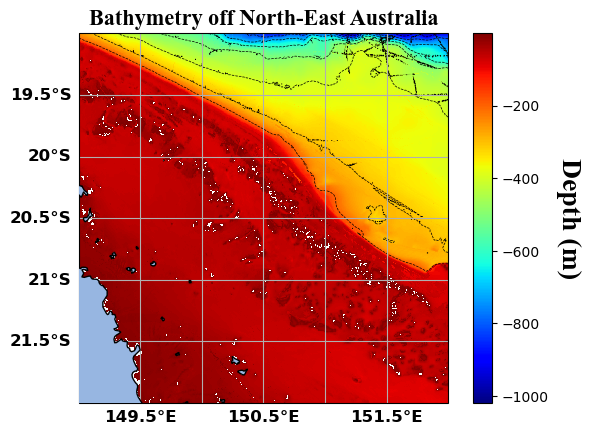

In [19]:
#%%
# To take out the land elevation

bathy0=bathy.astype('float')
bathy0[bathy0>=0]=np.nan

levels=np.arange(bathy_min, bathy_max, cint)
levels_clabel=np.arange(bathy_min, bathy_max, cint)

land_10m=cfeature.NaturalEarthFeature('physical','land', '10m', edgecolor='water',facecolor=cfeature.COLORS['water'])
ax=plt.axes(projection=ccrs.PlateCarree())

cmap = 'jet'
n=plt.pcolormesh(lon,lat,bathy0[:,:], shading='auto',cmap=cmap) #x and y axes are labelled after lon and lat
contours=plt.contour(lon,lat,bathy0[:,:],levels=levels, linewidths=0.5,colors='black')

cbar = plt.colorbar(n)
cbar.set_label('Depth (m)', labelpad=23, rotation=270,fontname='Times New Roman',fontsize=20, fontweight='bold')
ax.add_feature(land_10m, zorder=100, edgecolor='k')

s=ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
s.top_labels = False
s.bottom_labels = True
s.right_labels = False
s.left_labels = True
s.xlabel_style = {'size': 12, 'weight': 'bold'}
s.ylabel_style = {'size': 12, 'weight': 'bold'}

plt.xlabel('Longitude $^o$E',fontname='Times New Roman',fontsize=14,fontweight='bold')
plt.ylabel('Latitude $^o$S',fontname='Times New Roman',fontsize=14,fontweight='bold')
plt.title('Bathymetry off North-East Australia',fontname='Times New Roman',fontsize=16,fontweight='bold')

## Plot mean annual chlorophyll

In [20]:
ds = xr.open_dataset('ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 12, lon: 8640, lat: 4320)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 1997-12-01
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
Data variables:
    crs      int32 ...
    chlor_a  (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                               Climate Data Interface version ?? (htt...
    history:                           Tue Apr 27 20:27:21 2021: cdo selvar,c...
    source:                            NASA SeaWiFS  L1A and L2 R2018.0 LAC a...
    institution:                       Plymouth Marine Laboratory
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    ...                                ...
    time_coverage_start:               199801010000Z
    time_coverage_end:                 202001312359Z
    id:                                ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHL...
    NCO:                               4.7.2
    nco_openmp_thread_number:          1
    CDO:                               Climate Data Operators version 1.9.3 (...

In [26]:
# Slice data
sliced_ds = ds.sel(lon = slice(149,152), lat = slice(-19,-22))
sliced_ds


<xarray.Dataset>
Dimensions:  (time: 12, lon: 72, lat: 72)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 1997-12-01
  * lon      (lon) float64 149.0 149.1 149.1 149.1 ... 151.9 151.9 151.9 152.0
  * lat      (lat) float64 -19.02 -19.06 -19.1 -19.15 ... -21.9 -21.94 -21.98
Data variables:
    crs      int32 1
    chlor_a  (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                               Climate Data Interface version ?? (htt...
    history:                           Tue Apr 27 20:27:21 2021: cdo selvar,c...
    source:                            NASA SeaWiFS  L1A and L2 R2018.0 LAC a...
    institution:                       Plymouth Marine Laboratory
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    ...                                ...
    time_coverage_start:               199801010000Z
    time_coverage_end:                 202001312359Z
    id:                                ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHL...
    NCO:                               4.7.2
    nco_openmp_thread_number:          1
    CDO:                               Climate Data Operators version 1.9.3 (...

In [22]:
sliced_ds_mean = sliced_ds.mean(dim='time')
print(sliced_ds_mean)


<xarray.Dataset>
Dimensions:  (lon: 72, lat: 72)
Coordinates:
  * lon      (lon) float64 149.0 149.1 149.1 149.1 ... 151.9 151.9 151.9 152.0
  * lat      (lat) float64 -19.02 -19.06 -19.1 -19.15 ... -21.9 -21.94 -21.98
Data variables:
    crs      float64 1.0
    chlor_a  (lat, lon) float32 0.1077 0.107 0.1046 ... 0.2808 0.2911 0.3554


In [23]:
# READ IN THE DATA
lon = sliced_ds_mean.lon.values
lat = sliced_ds_mean.lat.values
chl = sliced_ds_mean.chlor_a.values

Text(0, 0.5, 'Latitude $^o$S')

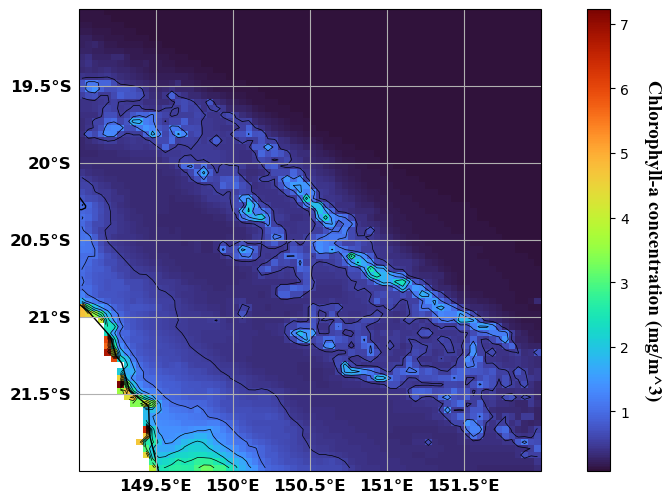

In [25]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
n=plt.pcolormesh(lon,lat,chl[:,:], shading='auto',cmap='turbo') #x and y axes are labelled after lon and lat
contours=plt.contour(lon,lat,chl[:,:],levels=np.arange(0.,30.,0.5), linewidths=0.5,colors='black')

cbar = plt.colorbar(n)
cbar.set_label('Chlorophyll-a concentration (mg/m^3)', labelpad=23, rotation=270,fontname='Times New Roman',fontsize=14, fontweight='bold')

ax.add_feature(cartopy.feature.LAND, color = "white", edgecolor="black")
ax.coastlines("50m", color = "black")

s=ax.gridlines(draw_labels=True)
s.top_labels = False
s.bottom_labels = True
s.right_labels = False
s.left_labels = True
s.xlabel_style = {'size': 12, 'weight': 'bold'}
s.ylabel_style = {'size': 12, 'weight': 'bold'}

plt.xlabel('Longitude $^o$E',fontname='Times New Roman',fontsize=14,fontweight='bold')
plt.ylabel('Latitude $^o$S',fontname='Times New Roman',fontsize=14,fontweight='bold')
#plt.title('Chlorophyll-a Concentrations off North-East Australia',fontname='Times New Roman',fontsize=14,fontweight='bold')

## Faceted figure indicating seasonal variability in chlorophyll

In [11]:
monthly_mean = sliced_ds.groupby('time.month').mean()
monthly_mean

<xarray.Dataset>
Dimensions:  (lon: 72, lat: 72, month: 12)
Coordinates:
  * lon      (lon) float64 149.0 149.1 149.1 149.1 ... 151.9 151.9 151.9 152.0
  * lat      (lat) float64 -19.02 -19.06 -19.1 -19.15 ... -21.9 -21.94 -21.98
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (month) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    chlor_a  (month, lat, lon) float32 0.102 0.09995 0.09717 ... 0.2462 0.3906
Attributes: (12/53)
    CDI:                               Climate Data Interface version ?? (htt...
    history:                           Tue Apr 27 20:27:21 2021: cdo selvar,c...
    source:                            NASA SeaWiFS  L1A and L2 R2018.0 LAC a...
    institution:                       Plymouth Marine Laboratory
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    ...                                ...
    time_coverage_start:               199801010000Z
    time_coverage_end:                 202001312359Z
    id:                                ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHL...
    NCO:                               4.7.2
    nco_openmp_thread_number:          1
    CDO:                               Climate Data Operators version 1.9.3 (...

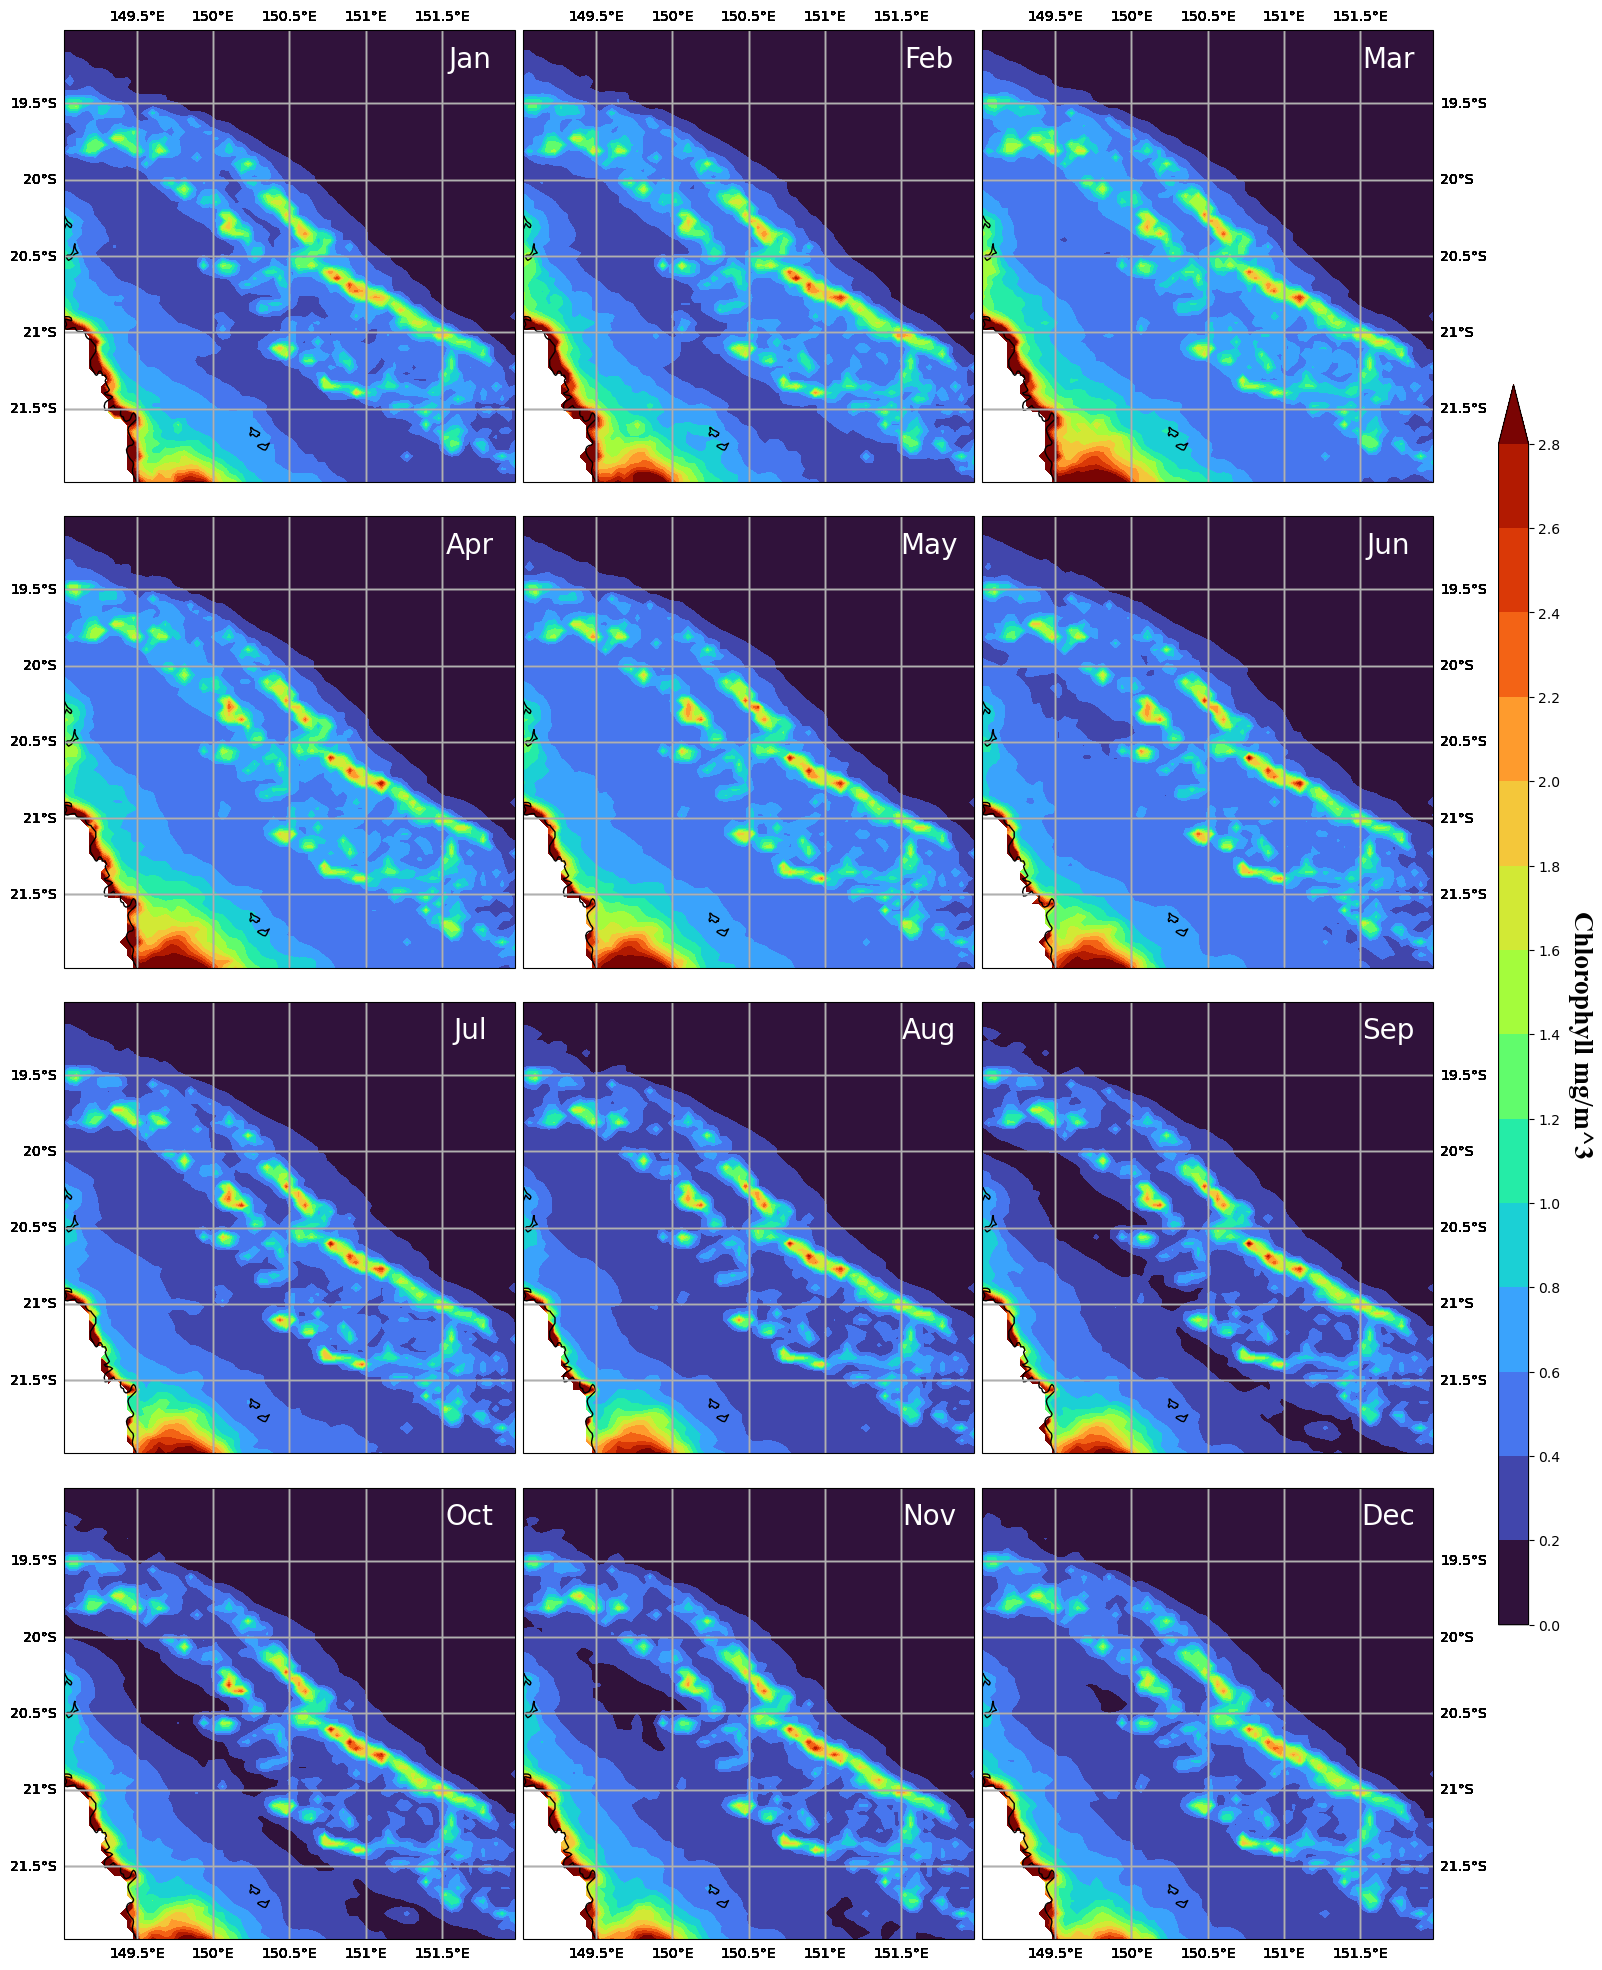

In [27]:
#%% Small Scale Climatology Plot
fig,axes = plt.subplots(4,3,figsize=[15,20], sharex=True, sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})  #4 rows and 3 columns


#cartopy land projections
                  
land_10m=cfeature.NaturalEarthFeature('physical','land', '10m', edgecolor='water',facecolor=cfeature.COLORS['land'])


#Creating monthly means
for i, month in enumerate(range(1,13)):
    monthly_chl = sliced_ds['chlor_a'].where(sliced_ds['time.month'] == month).mean(dim='time')
    #Determine subplot coordinates
    row = i //3
    col = i % 3
    #Plot
    clim = monthly_chl.plot.contourf(ax = axes[row,col], transform = ccrs.PlateCarree(),
                                     cmap = 'turbo', levels = np.arange(0., 3., 0.2), add_colorbar = False)
    #Add coastlines
    axes[row, col].coastlines()

    #Set titles for each subplot
    axes[0,0].set_title('Jan', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[0,1].set_title('Feb', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[0,2].set_title('Mar', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[1,0].set_title('Apr', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[1,1].set_title('May', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[1,2].set_title('Jun', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[2,0].set_title('Jul', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[2,1].set_title('Aug', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[2,2].set_title('Sep', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[3,0].set_title('Oct', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[3,1].set_title('Nov', color = 'white', fontsize=20, x=0.9, y=0.9)
    axes[3,2].set_title('Dec', color = 'white', fontsize=20, x=0.9, y=0.9)

    #Add gridlines
    gl = axes[0,0].gridlines(draw_labels=True)
    gl.right_labels = False
    gl.bottom_labels = False
    gl2 = axes[0,1].gridlines(draw_labels=True)
    gl2.right_labels = False
    gl2.bottom_labels = False
    gl2.left_labels = False
    gl3 = axes[0,2].gridlines(draw_labels=True)
    gl3.left_labels = False
    gl3.bottom_labels = False
    gl4 = axes[1,0].gridlines(draw_labels=True)
    gl4.right_labels = False
    gl4.bottom_labels = False
    gl4.top_labels = False
    gl5 = axes[1,1].gridlines(draw_labels=False)
    gl6 = axes[1,2].gridlines(draw_labels=True)
    gl6.left_labels = False
    gl6.bottom_labels = False
    gl6.top_labels = False
    gl7 = axes[2,0].gridlines(draw_labels=True)
    gl7.right_labels = False
    gl7.bottom_labels = False
    gl7.top_labels = False
    gl8 = axes[2,1].gridlines(draw_labels=False)
    gl9 = axes[2,2].gridlines(draw_labels=True)
    gl9.left_labels = False
    gl9.bottom_labels = False
    gl9.top_labels = False
    gl10 = axes[3,0].gridlines(draw_labels=True)
    gl10.right_labels = False
    gl10.top_labels = False
    gl11 = axes[3,1].gridlines(draw_labels=True)
    gl11.right_labels = False
    gl11.left_labels = False
    gl11.top_labels = False
    gl12 = axes[3,2].gridlines(draw_labels=True)
    gl12.left_labels = False
    gl12.top_labels = False


fig.tight_layout()

# To plot a big color bar on the side
cbar_right= 1
cbar_bottom=0.180
cbar_width=0.02
cbar_height=0.620
cb_ax = fig.add_axes([cbar_right, cbar_bottom, cbar_width,cbar_height ])
cbar = fig.colorbar(clim, cax=cb_ax, ticks=np.arange(0., 3, 0.2))
cbar.set_label('Chlorophyll mg/m^3', labelpad=23, rotation=270,fontname='Times New Roman',fontsize=20, fontweight='bold')
plt.show()



<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 1997-12-01
Data variables:
    crs      float64 1.0
    chlor_a  (time) float32 0.4445 0.5035 0.5517 0.5308 ... 0.375 0.3858 0.3904
<xarray.Dataset>
Dimensions:  (lon: 72, lat: 72, month: 12)
Coordinates:
  * lon      (lon) float64 149.0 149.1 149.1 149.1 ... 151.9 151.9 151.9 152.0
  * lat      (lat) float64 -19.02 -19.06 -19.1 -19.15 ... -21.9 -21.94 -21.98
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (month) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    chlor_a  (month, lat, lon) float32 0.102 0.09995 0.09717 ... 0.2462 0.3906
Attributes: (12/53)
    CDI:                               Climate Data Interface version ?? (htt...
    history:                           Tue Apr 27 20:27:21 2021: cdo selvar,c...
    source:                            NASA SeaWiFS  L1A and L2 R2018.0 LAC a...
    institution:                  

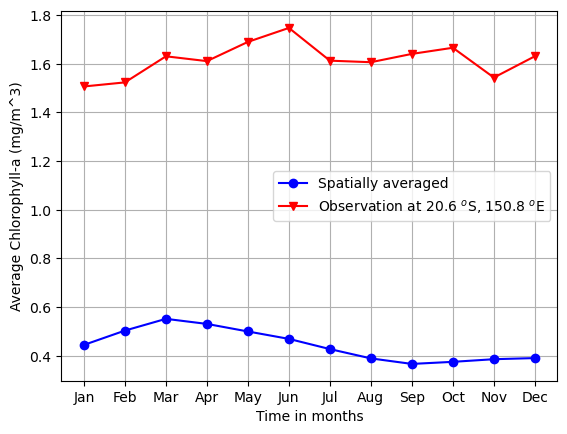

In [69]:
#Create timeseries for whole area
chl_mean = sliced_ds.mean(dim=['lat', 'lon'])
print(chl_mean)
#chl_mean.scatter(figsize=(10,8),marker='o')
plt.plot(chl_mean['time.month'], chl_mean['chlor_a'], "-b", marker='o', label="Spatially averaged")
plt.ylabel('Average Chlorophyll-a (mg/m^3)')
plt.xlabel('Time in months')
plt.legend(loc="best")

loc = chl_mean['time.month']
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(loc, labels, rotation='horizontal')

#Create timeseries for one point
monclim = sliced_ds.groupby('time.month').mean(dim='time')
print(monclim)

point = monclim.sel(lat=-20.6, lon=150.8, method='nearest')
plt.plot(monclim['month'], point['chlor_a'], "-r", marker='v', label = "Observation at 20.6 $^{o}$S, 150.8 $^{o}$E")
plt.legend(loc="best")
plt.grid()

plt.show()